<a href="https://colab.research.google.com/github/tkhan3/machinelearning/blob/master/hr_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
#import pandas as pd
!google-drive-ocamlfuse drive
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
!mkdir -p drive
!google-drive-ocamlfuse drive

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110842 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
import pandas as pd
from datetime import datetime
import os

drive_path = 'drive/DL_COLAB/'

HR_ANALYTICS_PATH = os.path.join(drive_path,"hr_analytics")


In [28]:
print (HR_ANALYTICS_PATH)

drive/DL_COLAB/hr_analytics


In [0]:
import pandas as pd

def load_hr_data(filename, file_path=HR_ANALYTICS_PATH):
    csv_path = os.path.join(file_path, filename)
    return pd.read_csv(csv_path,sep="|")

In [0]:
hr_data = load_hr_data("attrition_data_csv.csv")

In [31]:
hr_data.shape

(1470, 33)

In [32]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate            

In [33]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [0]:
cat_attribute = ["Attrition","BusinessTravel","Department","Gender","JobRole","MaritalStatus","OverTime"]

In [35]:
for item in cat_attribute:
  print(hr_data[item].value_counts())
  print ("*************************")

No     1233
Yes     237
Name: Attrition, dtype: int64
*************************
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*************************
Development        948
Marketing          216
Web Designing       76
Human Resources     72
QA & Testing        60
Networking          42
SEO                 30
Finance             13
Office Admin        13
Name: Department, dtype: int64
*************************
Male      882
Female    588
Name: Gender, dtype: int64
*************************
Software Developer              676
Project Manager                 253
Marketing Executive             202
Web Designer                     67
Human Resources                  55
Manager                          35
Associate Tester                 33
Internet Marketing Executive     28
System Adminstrator              27
QA & Testing                     14
Marketing Manager                 8
Finance Executive                 8
Mark

In [0]:
#temp = hr_data[["Attrition", "Department"]].query('Attrition == \'Yes\'').groupby(['Department']).count()
#MaritalStatusprint (type(temp))
#print (temp.columns)
#temp.hist()
#print (temp)
#hr_data = hr_data.plot.bar(x='Attrition', y='Gender', rot=0).

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


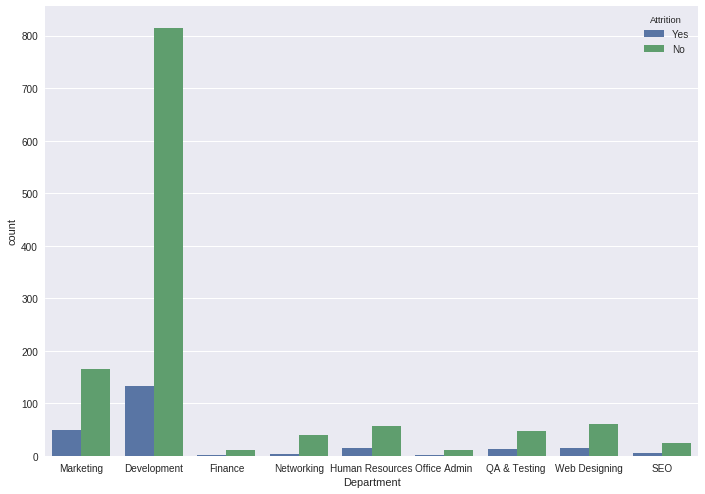

In [86]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="Department",data=hr_data,hue='Attrition')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


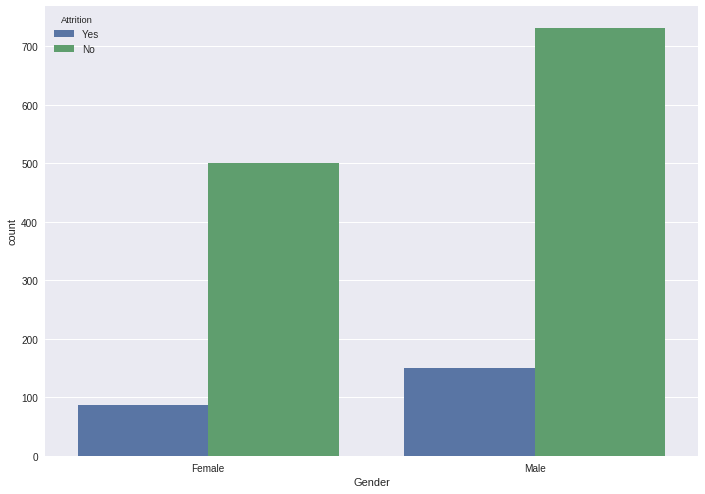

In [87]:
sns.countplot(x="Gender",data=hr_data,hue='Attrition')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


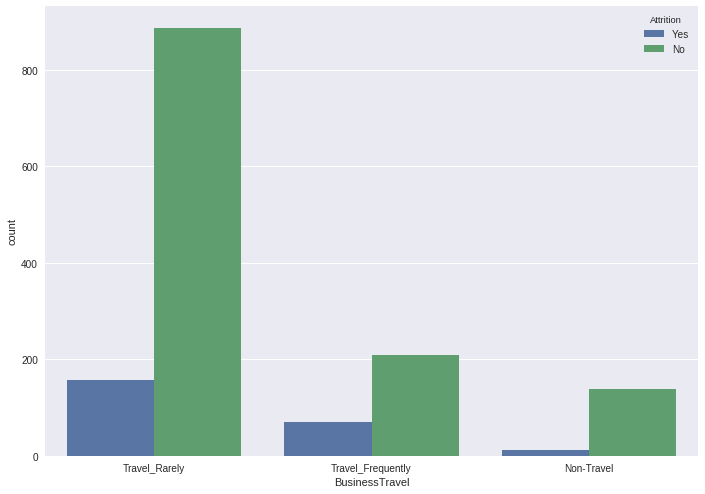

In [88]:
sns.countplot(x="BusinessTravel",data=hr_data,hue='Attrition')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[Text(0,0,'Marketing Executive'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Finance Executive'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Project Manager'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'System Adminstrator'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Project Manager'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Marketing Manager'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Project Manager'),
 Text(0,0,'Marketing Executive'),
 Text(0,0,'Project Manager'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Project Manager'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Marketing Executive'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Marketing Manager'),
 Text(0,0,'Software Deve

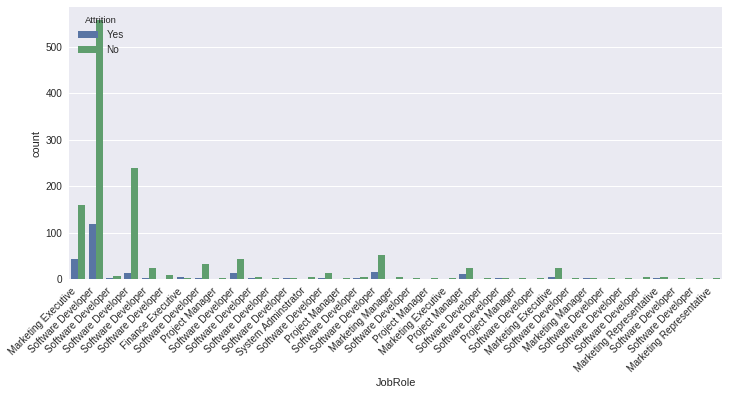

In [106]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
ax = fig.add_subplot(111)
sns.set(rc={'figure.figsize':(11.7,5.7)})
sns.countplot(x="JobRole",data=hr_data,hue='Attrition')
xticklabels = hr_data["JobRole"]
ax.set_xticklabels(xticklabels, rotation = 45, ha="right")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


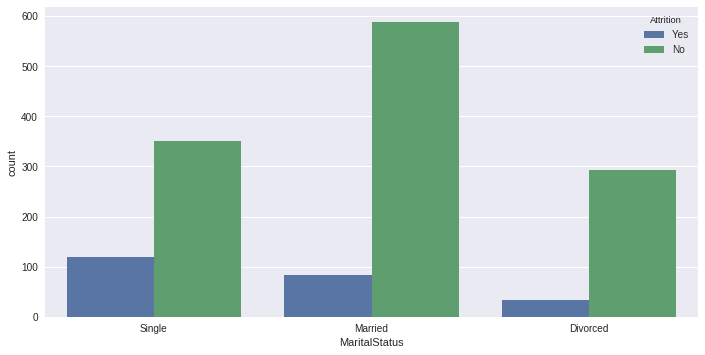

In [108]:
sns.set(rc={'figure.figsize':(11.7,5.7)})
sns.countplot(x="MaritalStatus",data=hr_data,hue='Attrition')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


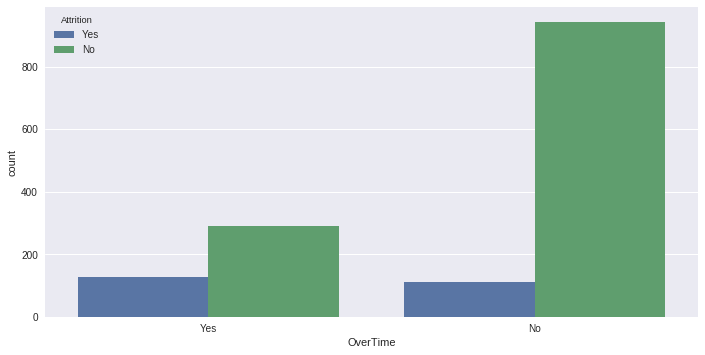

In [109]:
sns.set(rc={'figure.figsize':(11.7,5.7)})
sns.countplot(x="OverTime",data=hr_data,hue='Attrition')

In [0]:
#import seaborn as sns
#sns.catplot(x="MaritalStatus", hue="Gender", col="Attrition",data=hr_data, kind="count",height=4, aspect=.7)

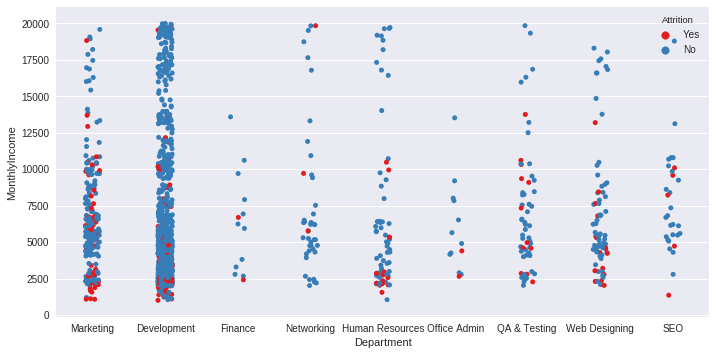

In [123]:
sns.stripplot(x="Department", y="MonthlyIncome", hue="Attrition",data=hr_data, jitter=True,palette="Set1")

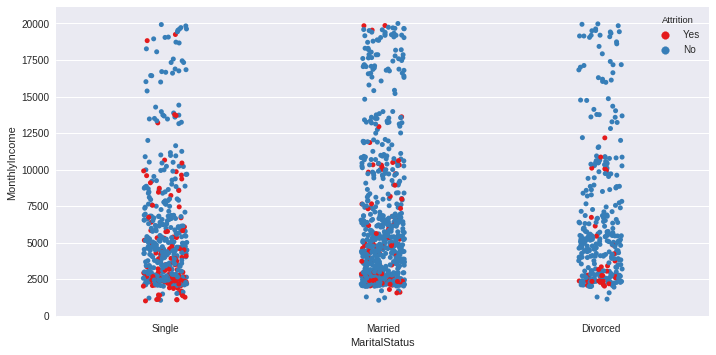

In [122]:
sns.stripplot(x="MaritalStatus", y="MonthlyIncome", hue="Attrition",data=hr_data, jitter=True,palette="Set1")